In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
!pip install itables  # baraye namayeshe kole table

In [ ]:
# https://drive.google.com/drive/folders/1EAqxx0Z7tjycnHTgwL8Tx3q4i5ngLHnm?usp=drive_link
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learnnig_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/diabetes.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(768, 9)

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

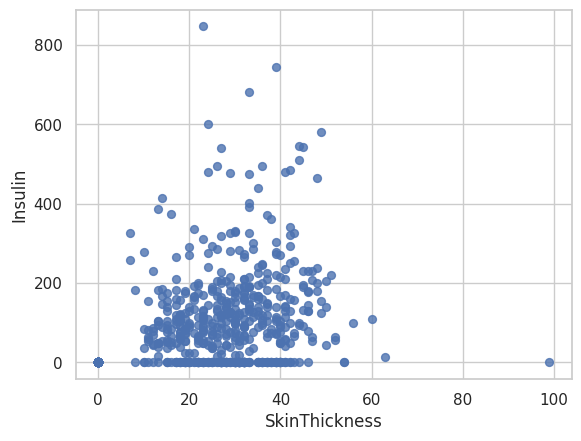

In [ ]:
# @title SkinThickness vs Insulin

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.show()

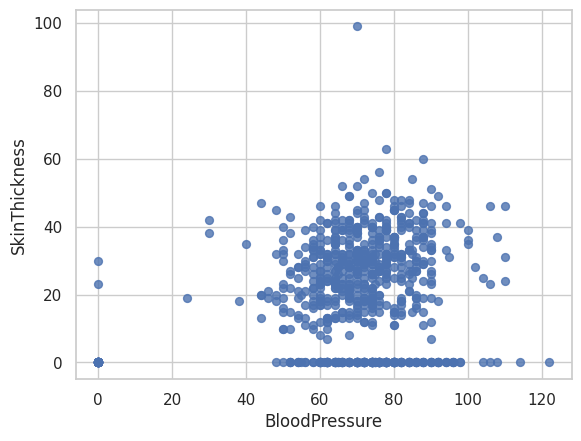

In [ ]:
# @title BloodPressure vs SkinThickness

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.show()

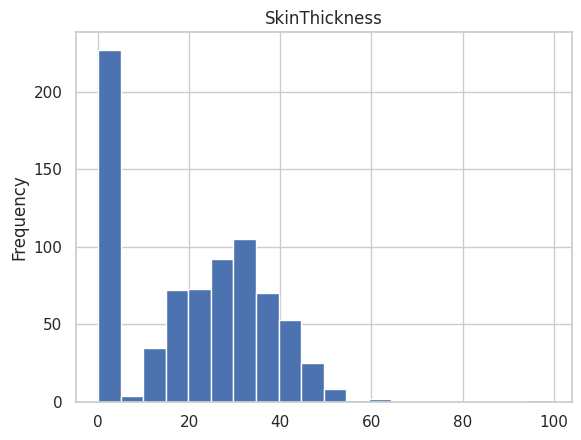

In [ ]:
# @title SkinThickness

from matplotlib import pyplot as plt
df['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.show()

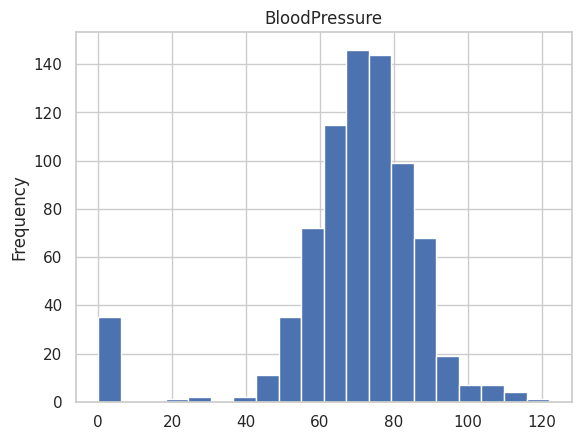

In [ ]:
# @title BloodPressure

from matplotlib import pyplot as plt
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.show()

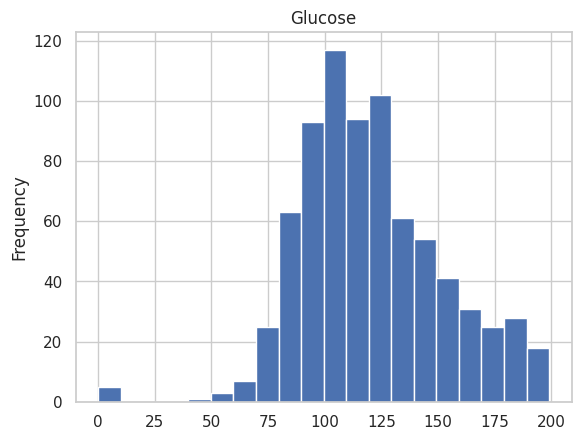

In [ ]:
# @title Glucose

from matplotlib import pyplot as plt
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.show()

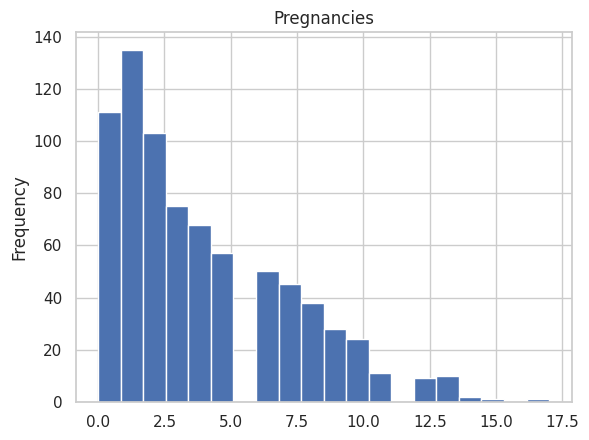

In [ ]:
# @title Pregnancies

from matplotlib import pyplot as plt
df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.show()

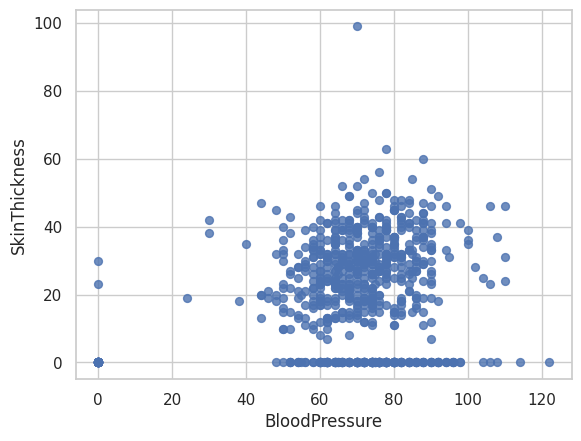

In [ ]:
# @title BloodPressure vs SkinThickness

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.show()

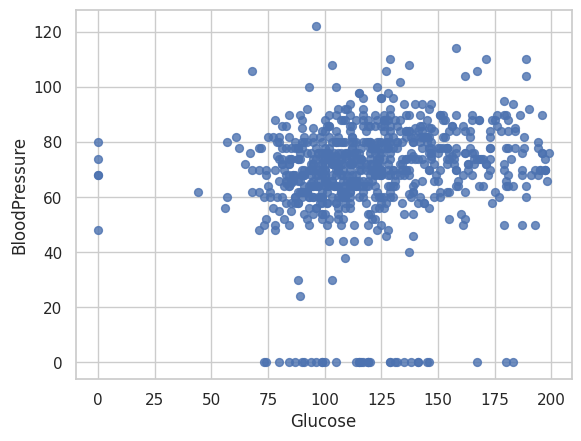

In [ ]:
# @title Glucose vs BloodPressure

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.show()

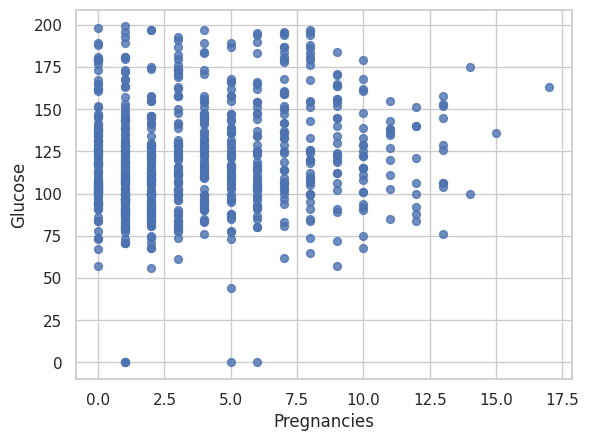

In [ ]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.show()

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(x,y, train_size = 0.8 , stratify = y ,random_state = 5)

In [ ]:
dt = DecisionTreeClassifier( random_state = 42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_test)    ############################### DT = 70

0.7012987012987013

In [ ]:
ppn = Perceptron(random_state = 42)
ppn.fit(x_train, y_train)
ppn.score(x_test,y_test)  ########################  PPN = 61

0.6168831168831169

In [ ]:
ppn.score(x_train,y_train)

0.6319218241042345

In [ ]:
lr = LogisticRegression(random_state = 42, n_jobs= -1)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)  ###################### LR = 75

0.7532467532467533

In [ ]:
lr.score(x_train,y_train)

0.7833876221498371

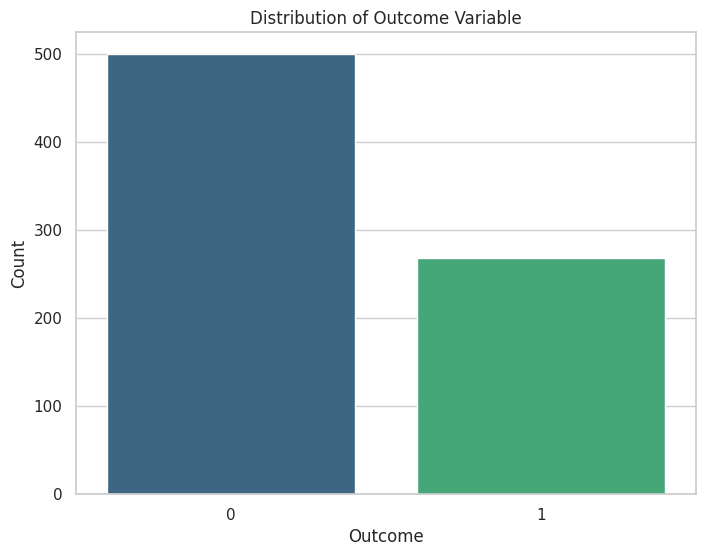

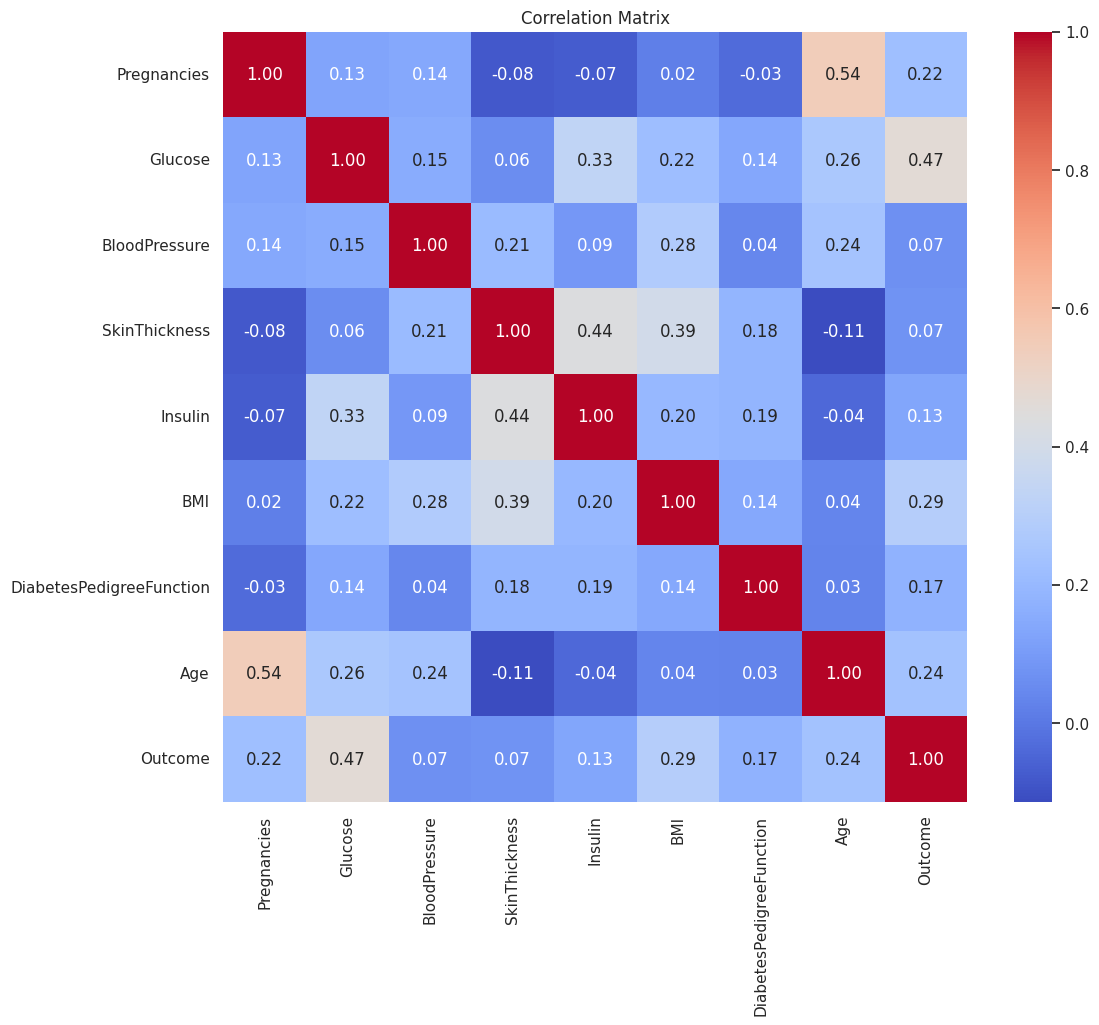

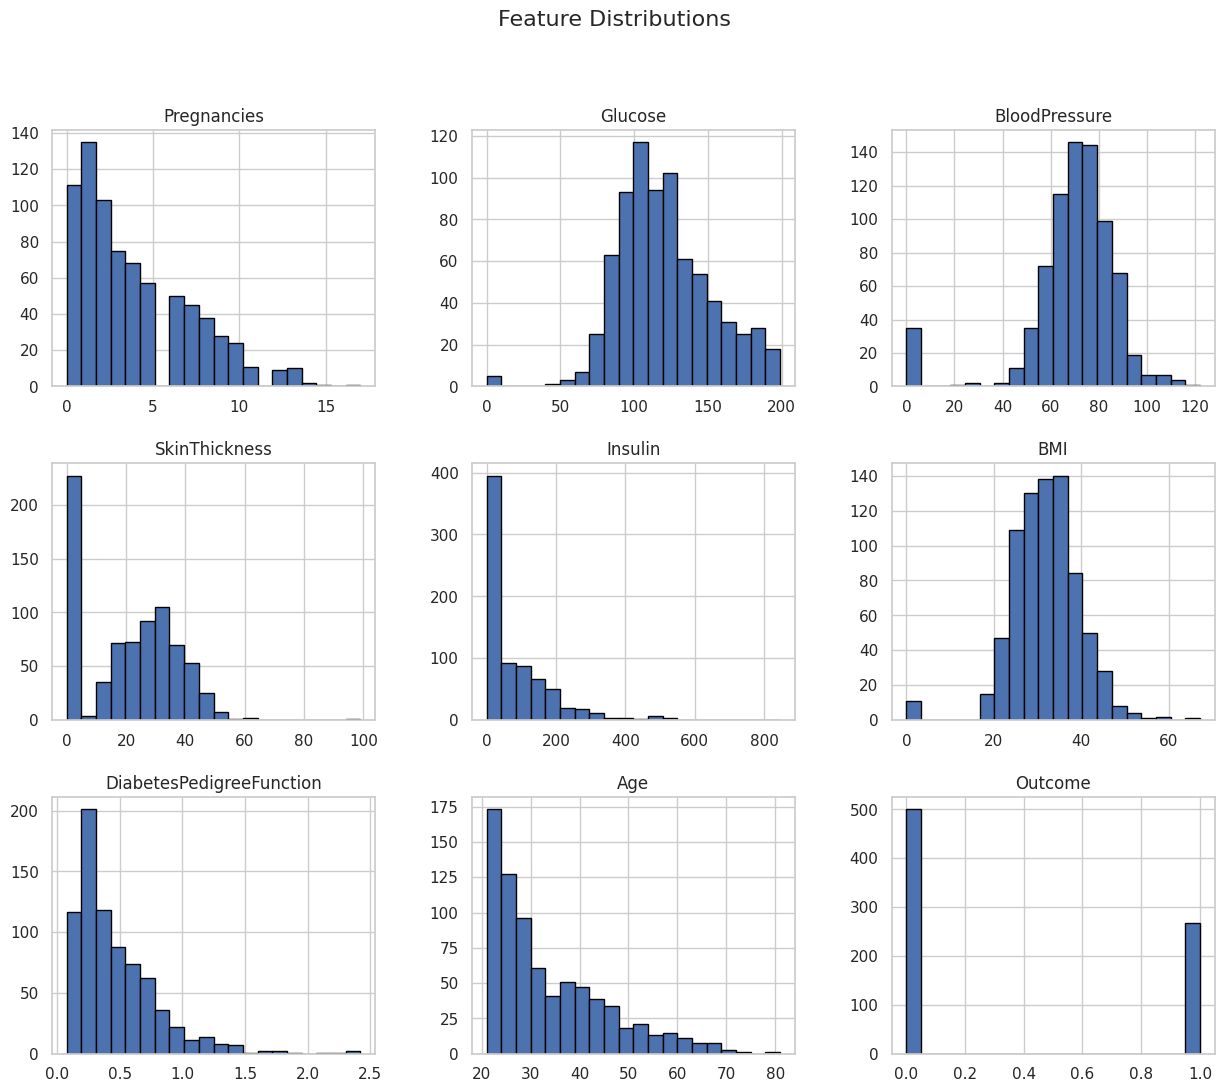

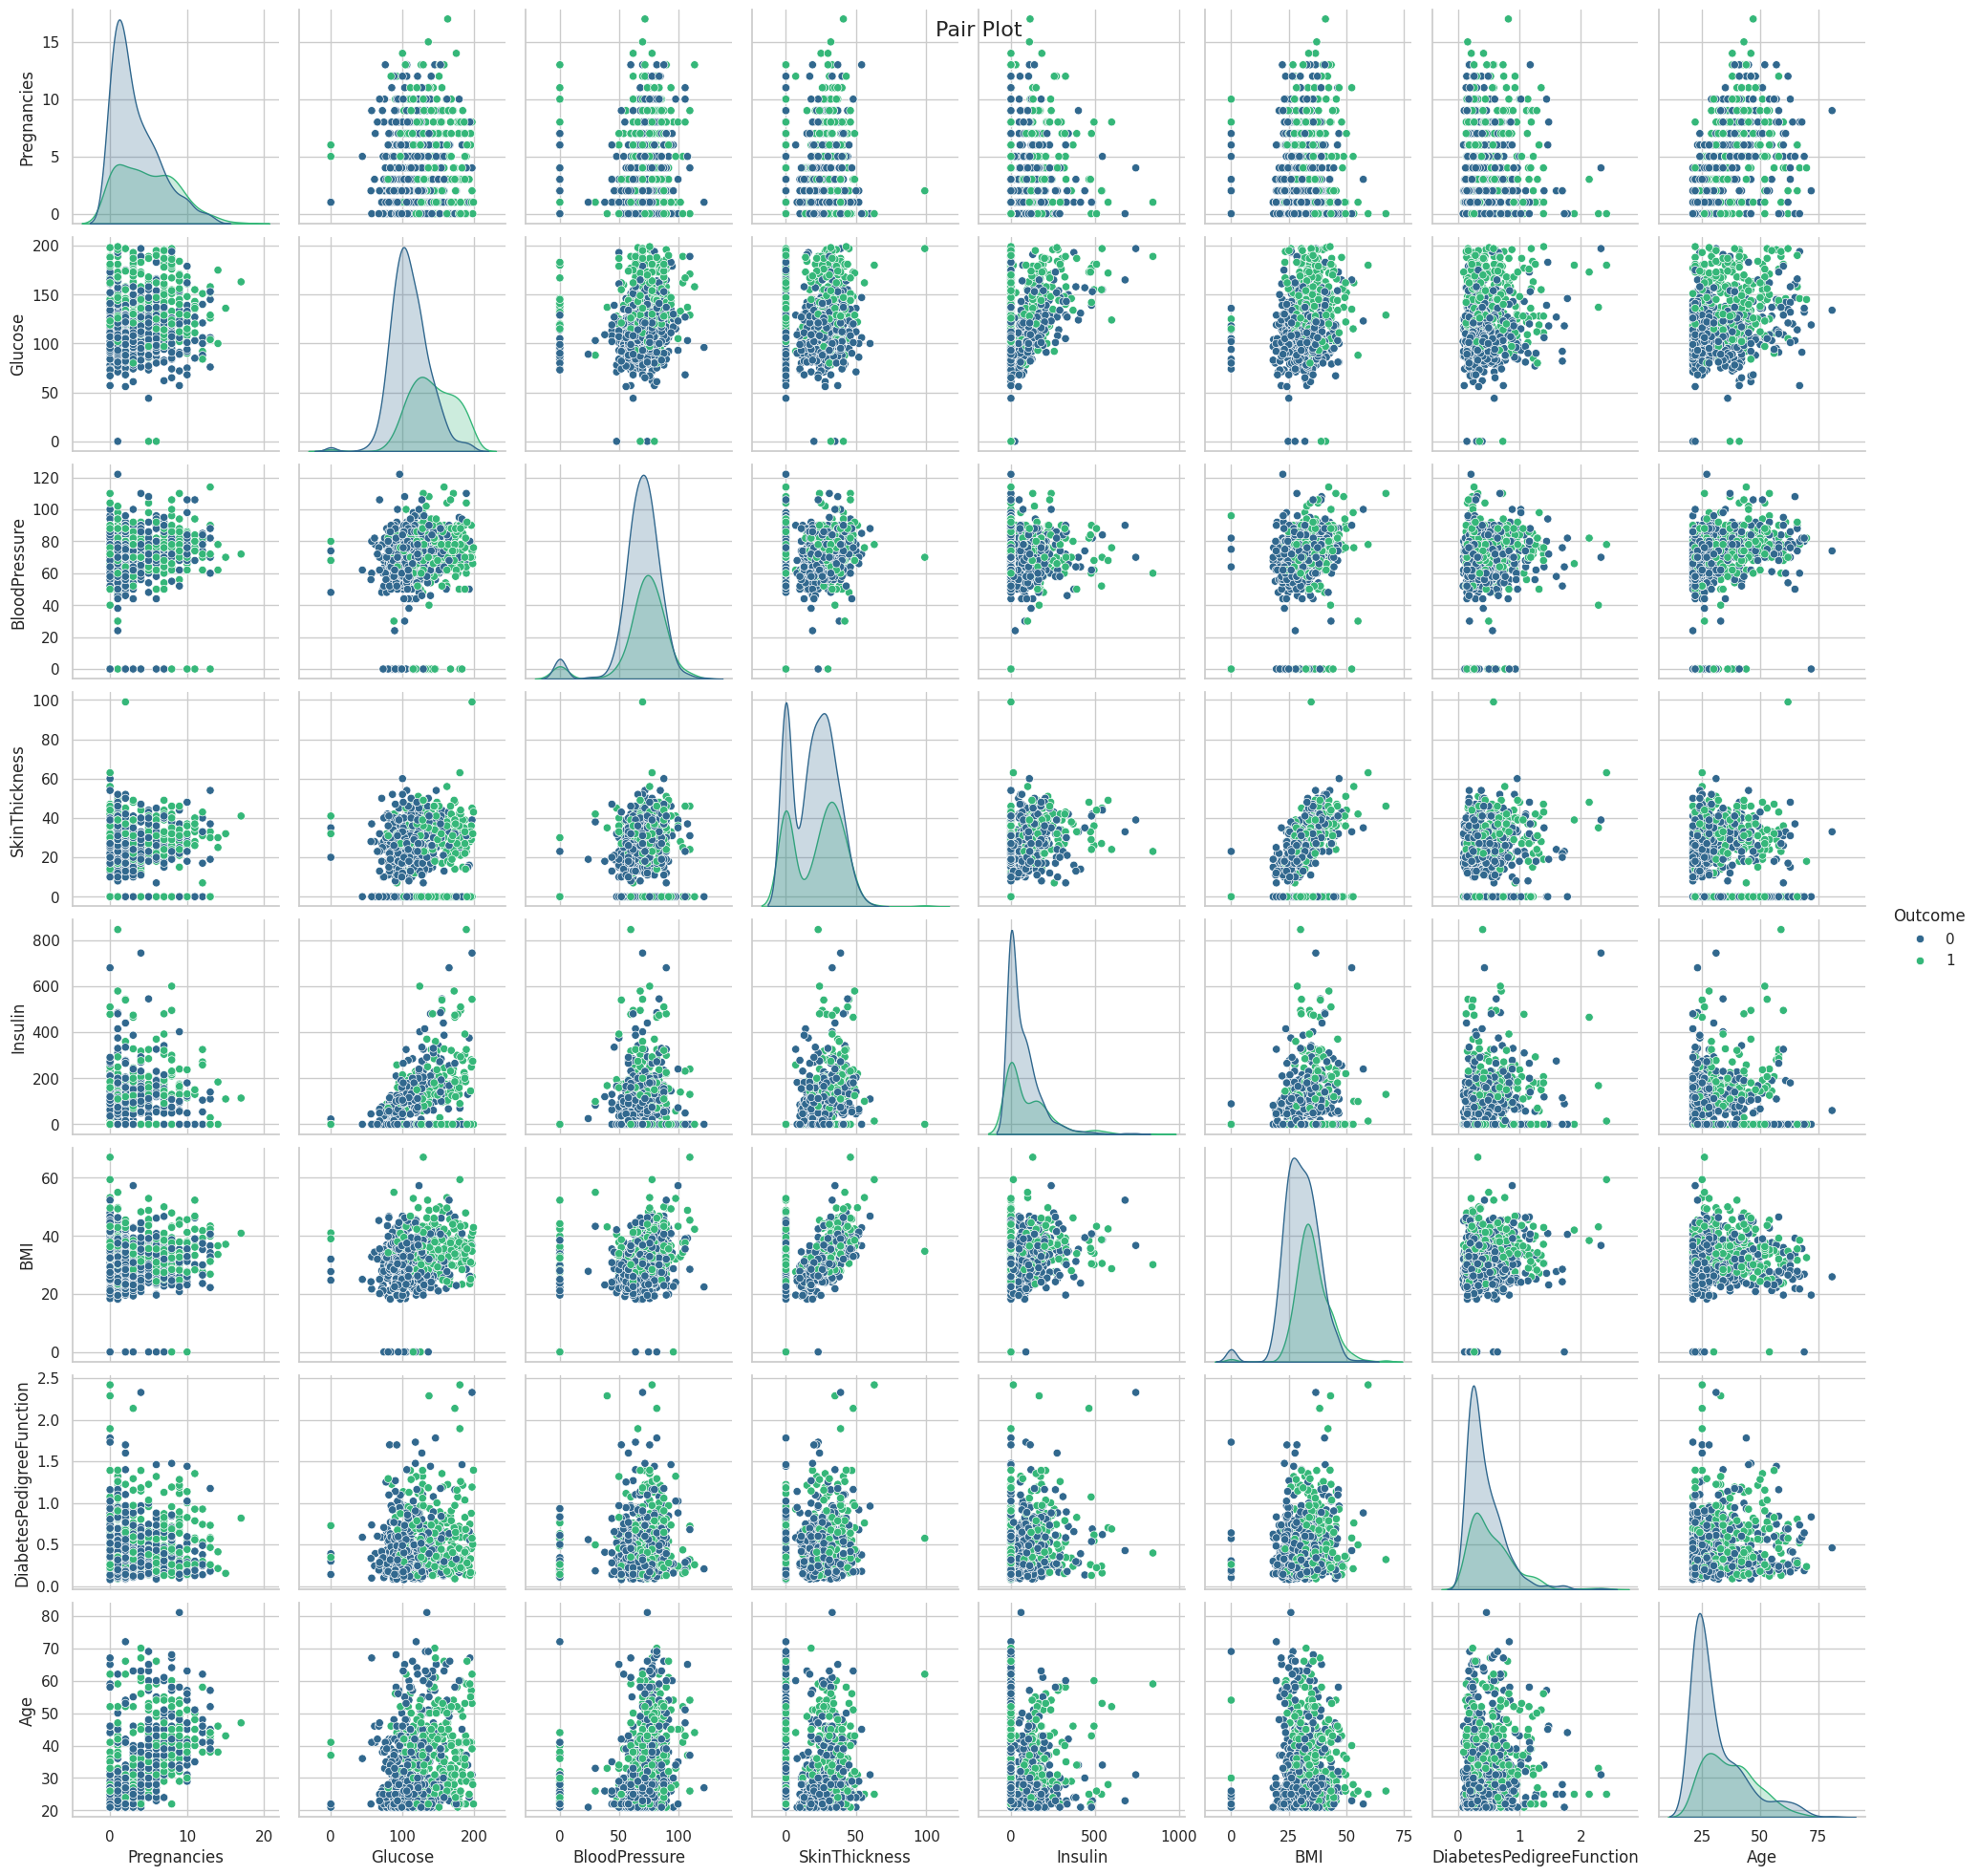

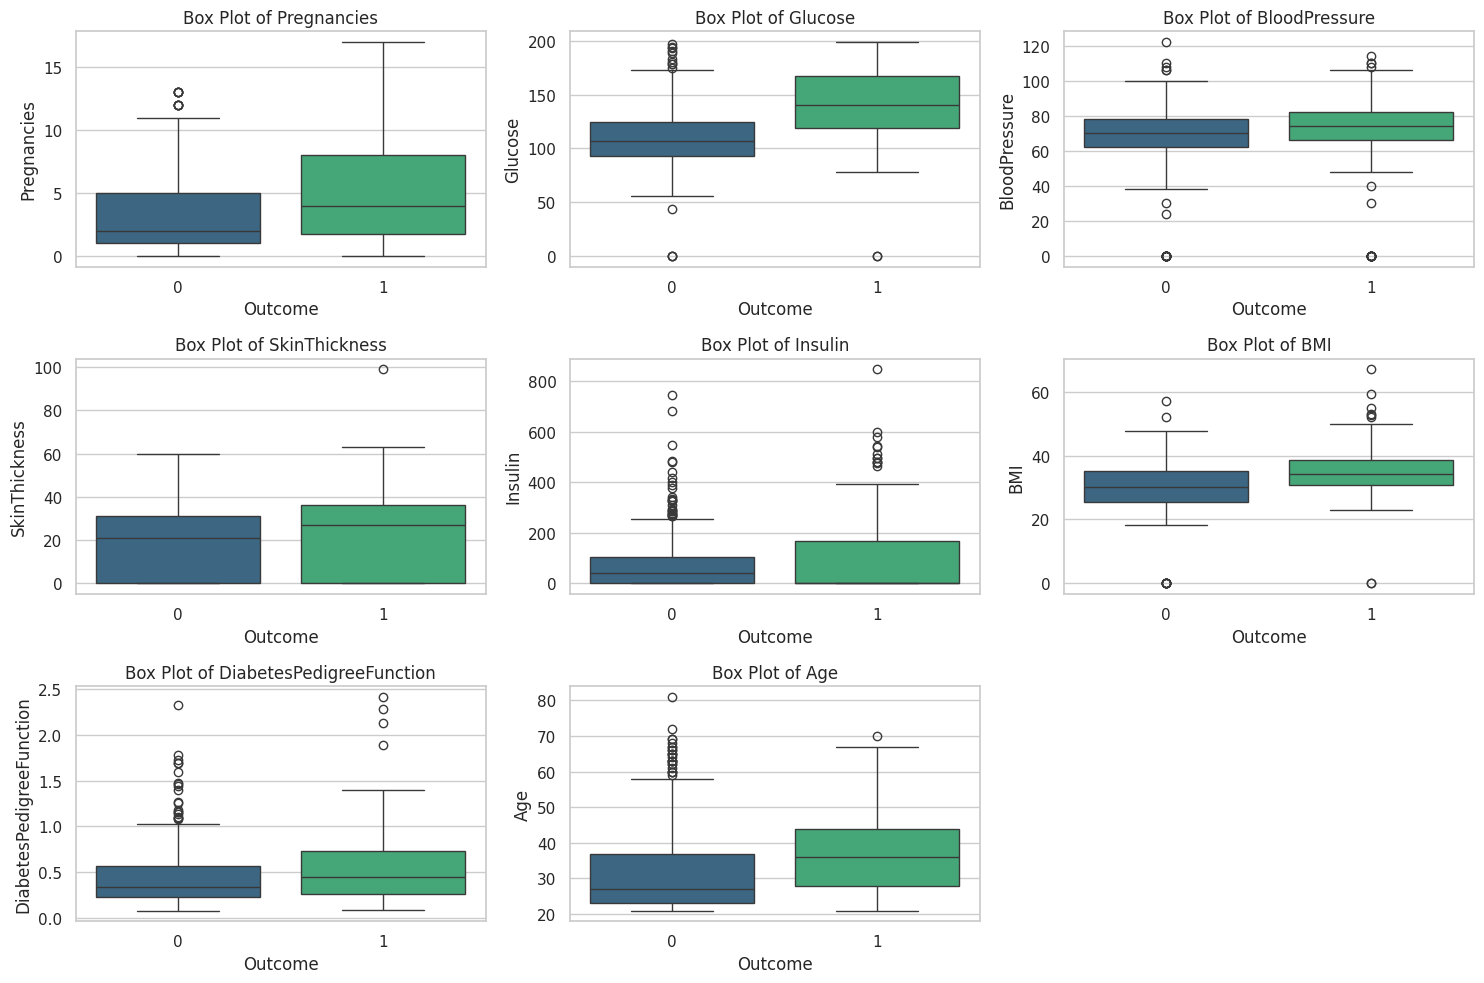

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Feature Distributions
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# 4. Pair Plot
sns.pairplot(df, hue='Outcome', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot', fontsize=16)
plt.show()

# 5. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df, palette='viridis')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()
